# `Business Problem`

Swiggy processes millions of food-delivery journeys across hundreds of cities every month. Accurate Estimated Time of Arrival (ETA) at order placement and during delivery is core to the customer experience — it affects conversion, cancellations, ratings, and retention. Today’s ETA accuracy suffers from many sources of uncertainty: highly variable traffic patterns, weather events, restaurant preparation variability, rider behaviour and skill, order batching/multiple deliveries, and city-specific operational constraints. Inaccurate ETAs cause:
Reduced customer trust and lower repeat orders.

+ Increased cancellations and refund costs.

+ Higher support volume and operational interventions.

+ Sub-optimal rider allocation and increased rider idle or overtime costs.


# `Problem Statement`

Swiggy’s objective is to predict the delivery time (minutes) per order at the moment of order placement (and update it dynamically), with business-grade accuracy and uncertainty estimates so the platform can

 +  show reliable ETAs to customers
 +  optimize rider allocation.
 
Build a production-ready, scalable Machine Learning system that predicts per-order delivery time (in minutes) using real-time and historical features (order, rider, restaurant, geospatial, traffic, weather, and temporal signals). The system must produce:


# `Dataset Overview`

+ `Rider_id`:- Unique identifier for each delivery partner.
+ `Age`       :- Age of the delivery partner.
+ `Ratings`                :-  Average customer rating of the rider.
+ `vehicle_condition`:-Condition of the rider’s vehicle.(0 => poor ,1=>Average, 2=>Good)
+ `Type_of_vehicle`   :-Vehicle used for delivery (motorcycle, scooter, etc.).
+ `Type_of_order`      :-Type of food ordered (snack, meal, drinks, buffet).
+ `multiple_deliveries`:-Number of deliveries assigned to the rider in a single trip.
+ `pickup_time_minutes`:-Time taken by the restaurant to prepare the order.
+ `restaurant_longitude`:-Geographic coordinates of the restaurant.
+ `delivery_longitude`:- Geographic coordinates of the customer’s delivery location.
+ `Is_weekend`             :-Indicates whether the order was placed on a weekend.
+ `Order_time_hour`    :-Hour when the order was placed (0–23).
+ `order_time_of_day`:- Time bucket (morning, afternoon, evening, night).
+ `Weather`                   :-Weather condition during delivery (sunny, cloudy, fog, stormy, sandstorms).
+ `Traffic`                     :-Traffic condition during delivery.
+ `Festival`                    :-Indicates whether the order was placed on a festival day.
+ `City_type`                 :-Classification of city (urban, metropolitan).
+ `City_name`               :-Name/code of the city (BANG, HYD, CHEN, etc.).
+ `Time_taken`             :- Actual time taken (in minutes) to complete the delivery.
+ `Distance`                   :-Distance (in km) between restaurant and delivery location.
+ `Order_date`               :-Date when the order was placed.
+ `Order_day`                :-Day of the month.
+ `Order_month`           :-Month of the order.
+ `order_day_of_week`:-Day of the week (Monday–Sunday).

> `Type of the Project`: Regression
> 
>  `Target Feature`: Time_taken

## 1. Data Understanding

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Sameeksha\Downloads\swiggy_demographic.csv")

In [3]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [4]:
df.shape

(45502, 26)

In [5]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of                 rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77

In [7]:
df.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,1.019406,0.744928,26.297591,13.811657,2.980726,0.274867,9.989399,17.423966,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,0.835229,0.572488,9.386419,8.709540,0.546031,0.446452,4.087516,4.817856,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


In [8]:
df.isna().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day          0
distance                3630
dtype: int64

+ number of missing values in a particular feature.

In [9]:
df.duplicated().sum()

np.int64(0)

+ no values is beaing repeated ..

In [10]:
target = 'time_taken'

+  time_taken feature is the target feature because the actual business problem is to find the ETA .. and time_taken feature is depending on all the other features..

In [11]:
df.drop(columns=['rider_id','order_date'],inplace = True)

+ dropping the columns which is unnecessary..

In [12]:
df.columns

Index(['age', 'ratings', 'restaurant_latitude', 'restaurant_longitude',
       'delivery_latitude', 'delivery_longitude', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken',
       'city_name', 'order_day', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_hour',
       'order_time_of_day', 'distance'],
      dtype='object')

In [13]:
numercial_columns = ['age','ratings',
                     'restaurant_latitude',
                     'restaurant_longitude',
                     'delivery_latitude',
                     'delivery_longitude',
                     'time_taken','order_month',
                     'pickup_time_minutes',
                     'order_time_hour','is_weekend',
                     'vehicle_condition','order_day',
                     'distance']

+ numerical columns of the above data

In [14]:
categorical_columns = ['weather',
                       'traffic',
                       'type_of_order',
                       'city_name','order_day_of_week','type_of_vehicle',
                       'festival','city_type',
                       'order_time_of_day']

+ categorical columns of the above data 

In [15]:
df

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,weather,traffic,vehicle_condition,type_of_order,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,sunny,high,2,snack,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,stormy,jam,2,snack,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,sandstorms,low,0,drinks,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,sunny,medium,0,buffet,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,cloudy,high,1,snack,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,26.902328,75.794257,26.912328,75.804257,windy,high,1,meal,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,21.0,4.6,NaN,NaN,NaN,NaN,windy,jam,0,buffet,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45499,30.0,4.9,13.022394,80.242439,13.052394,80.272439,cloudy,low,1,drinks,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45500,20.0,4.7,11.001753,76.986241,11.041753,77.026241,cloudy,high,0,snack,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


## 2. Data Preprocessing

In [16]:
df['time_taken'].describe()

count    45502.000000
mean        26.297591
std          9.386419
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: time_taken, dtype: float64

+ as the traget feature is `time_taken`..

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### `Histogram + KDE PLot`

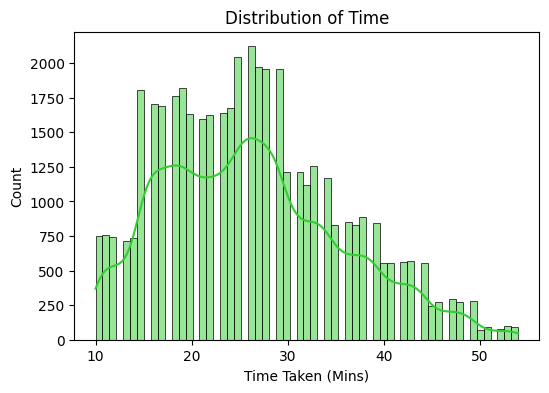

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['time_taken'],kde = True ,color = 'limegreen')
plt.title('Distribution of Time')
plt.xlabel('Time Taken (Mins)')
plt.show()

+ this is the visualization of delivery time .
+ the most of the deliveries done between 15 to 30 minutes. 
+ there is very few deliveries are gone till 40 to 50 minutes, due to weather or traffic issues.
+ the high frequency is at the 25 to 30 minutes.
+ Most of the deliveries are completed on `Time`

### `Scatterplot` : Distance with time_taken

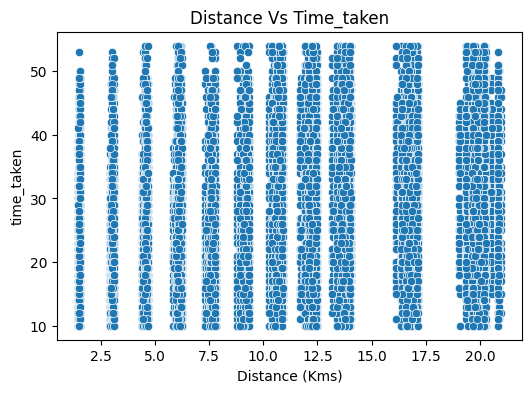

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'distance', y = 'time_taken', data = df )
plt.title('Distance Vs Time_taken')
plt.xlabel('Distance (Kms)')
plt.show()

+ By the above visual of Distance Vs Time . as the Distance increases the time will also get increased..
+ 1-1.5 Kms has the lower delivery times. where as the longer distance such as 15-20 Kms has higher delivery times..
+ each ball(dot) = one delivery order.  more balls(more dots) = more delivery order.
+ more orders have been ordered from the far distances whereas less orders have been ordered from the near distances.

### `Scatterplot` : pickup_time_minutes with time_taken

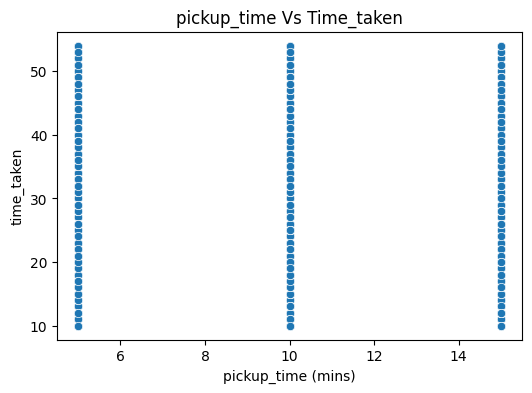

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'pickup_time_minutes', y = 'time_taken', data = df )
plt.title('pickup_time Vs Time_taken')
plt.xlabel('pickup_time (mins)')
plt.show()

+ by the above visual of pickup_time Vs Time_taken. 
+ higher pickup time , higher time taken.


### `Scatterplot` - ratings with Time_taken

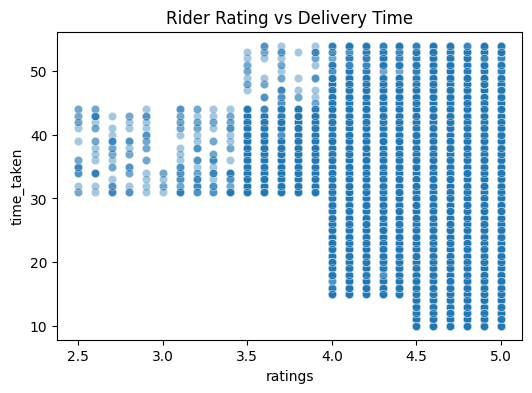

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='ratings',
    y='time_taken',
    data=df,
    alpha=0.4
)
plt.title("Rider Rating vs Delivery Time")
plt.show()

+ by the above visual of Rider Rating vs Delivery Time , the rider with low rating would be because of more time taken in delivery..
+ the rider with high ratings would be because of fastest delivery on average.
+ this prediction is not only based on the time taken we can also predict based on food and etc.
 

### `Outliers`

#### time_taken

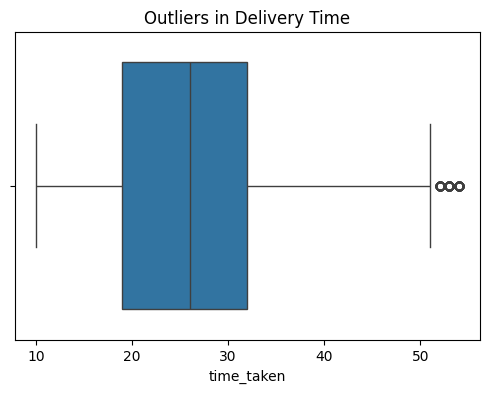

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

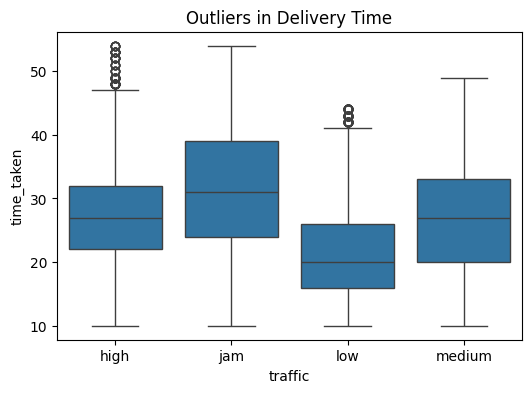

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['traffic'],
           y = df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

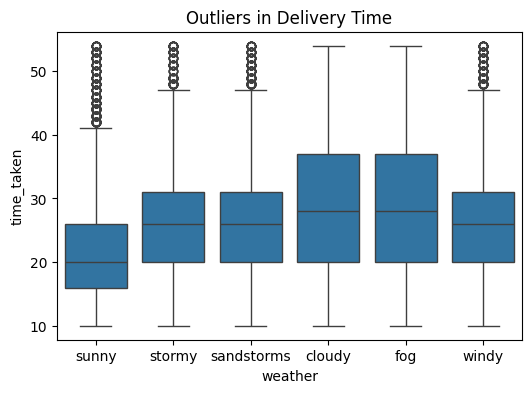

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['weather'],
           y = df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

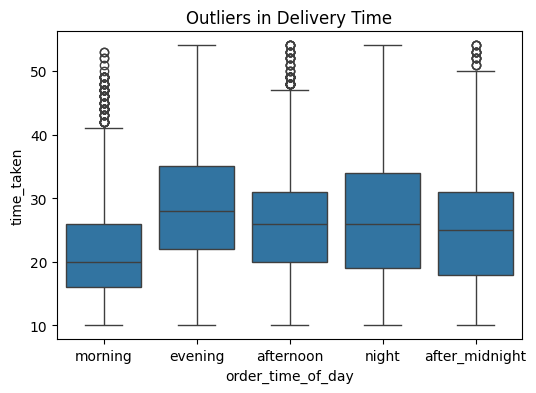

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['order_time_of_day'],
           y = df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

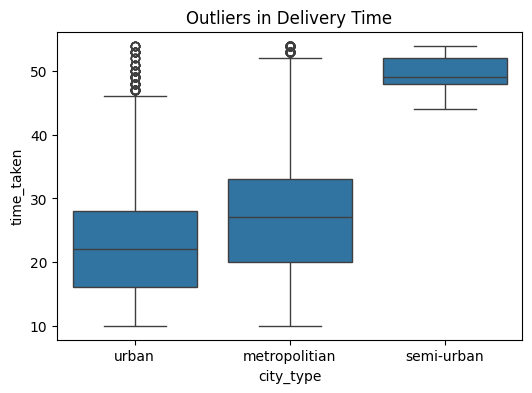

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['city_type'],
           y = df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

In [27]:
df.columns

Index(['age', 'ratings', 'restaurant_latitude', 'restaurant_longitude',
       'delivery_latitude', 'delivery_longitude', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken',
       'city_name', 'order_day', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_hour',
       'order_time_of_day', 'distance'],
      dtype='object')

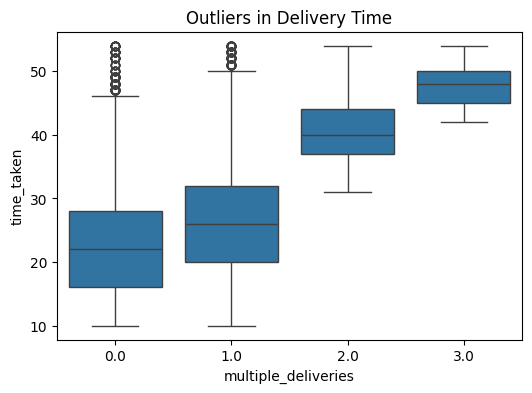

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['multiple_deliveries'],
           y = df['time_taken'])
plt.title("Outliers in Delivery Time")
plt.show()

In [29]:
categorical_columns

['weather',
 'traffic',
 'type_of_order',
 'city_name',
 'order_day_of_week',
 'type_of_vehicle',
 'festival',
 'city_type',
 'order_time_of_day']

In [30]:
for col in categorical_columns:
    df[col] = ( df[col].astype(str).str.lower().str.strip())

In [31]:
df

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,weather,traffic,vehicle_condition,type_of_order,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,sunny,high,2,snack,...,24,indo,19,3,saturday,1,15.0,11.0,morning,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,stormy,jam,2,snack,...,33,bang,25,3,friday,0,5.0,19.0,evening,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,sandstorms,low,0,drinks,...,26,bang,19,3,saturday,1,15.0,8.0,morning,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,sunny,medium,0,buffet,...,21,coimb,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,cloudy,high,1,snack,...,30,chen,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,26.902328,75.794257,26.912328,75.804257,windy,high,1,meal,...,32,jap,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,21.0,4.6,NaN,NaN,NaN,NaN,windy,jam,0,buffet,...,36,agr,16,2,wednesday,0,15.0,19.0,evening,NaN
45499,30.0,4.9,13.022394,80.242439,13.052394,80.272439,cloudy,low,1,drinks,...,16,chen,11,3,friday,0,15.0,23.0,night,4.657195
45500,20.0,4.7,11.001753,76.986241,11.041753,77.026241,cloudy,high,0,snack,...,26,coimb,7,3,monday,0,5.0,13.0,afternoon,6.232393


In [32]:
numercial_columns

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'order_month',
 'pickup_time_minutes',
 'order_time_hour',
 'is_weekend',
 'vehicle_condition',
 'order_day',
 'distance']

In [33]:
numerical_columns = ['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'order_month',
 'pickup_time_minutes',
 'order_time_hour',
 'is_weekend',
 'vehicle_condition',
 'order_day',
 'distance']


for col in numerical_columns :
    df[col].fillna(df[col].median(),inplace = True)

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0] , inplace = True)

+ filling all the missing values of numerical columns with median and all the categorical columns with mode.


In [34]:
df['multiple_deliveries'].fillna(df['multiple_deliveries'].median(),inplace = True)

In [35]:
df.isna().sum()

age                     0
ratings                 0
restaurant_latitude     0
restaurant_longitude    0
delivery_latitude       0
delivery_longitude      0
weather                 0
traffic                 0
vehicle_condition       0
type_of_order           0
type_of_vehicle         0
multiple_deliveries     0
festival                0
city_type               0
time_taken              0
city_name               0
order_day               0
order_month             0
order_day_of_week       0
is_weekend              0
pickup_time_minutes     0
order_time_hour         0
order_time_of_day       0
distance                0
dtype: int64

In [36]:
df

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,weather,traffic,vehicle_condition,type_of_order,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,sunny,high,2,snack,...,24,indo,19,3,saturday,1,15.0,11.0,morning,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,stormy,jam,2,snack,...,33,bang,25,3,friday,0,5.0,19.0,evening,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,sandstorms,low,0,drinks,...,26,bang,19,3,saturday,1,15.0,8.0,morning,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,sunny,medium,0,buffet,...,21,coimb,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,cloudy,high,1,snack,...,30,chen,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,26.902328,75.794257,26.912328,75.804257,windy,high,1,meal,...,32,jap,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,21.0,4.6,19.065838,76.618203,19.124049,76.662620,windy,jam,0,buffet,...,36,agr,16,2,wednesday,0,15.0,19.0,evening,9.193014
45499,30.0,4.9,13.022394,80.242439,13.052394,80.272439,cloudy,low,1,drinks,...,16,chen,11,3,friday,0,15.0,23.0,night,4.657195
45500,20.0,4.7,11.001753,76.986241,11.041753,77.026241,cloudy,high,0,snack,...,26,coimb,7,3,monday,0,5.0,13.0,afternoon,6.232393


In [37]:
categorical_columns

['weather',
 'traffic',
 'type_of_order',
 'city_name',
 'order_day_of_week',
 'type_of_vehicle',
 'festival',
 'city_type',
 'order_time_of_day']

In [38]:
df['order_timing'] = df['order_time_hour'].apply(lambda x: 0 if (6 <= x <= 11) or (18 <= x <= 23) else 1) 

In [39]:
df['order_timing'].unique()

array([0, 1])

In [40]:
df['order_counts'] = (df['multiple_deliveries'] >= 2 ).astype(int)

In [41]:
df['order_counts'].unique()

array([0, 1])

In [42]:
df['traffic'] = df['traffic'].astype(str).str.lower().str.strip()

In [43]:
df['traffic'].unique()

array(['high', 'jam', 'low', 'medium', 'nan'], dtype=object)

In [44]:
traffic_map = {'low': 0, 'medium': 1, 'high': 2, 'jam': 3}
df['traffic'] = df['traffic'].map(traffic_map)

In [45]:
df['traffic'].unique()

array([ 2.,  3.,  0.,  1., nan])

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
target= "time_taken"
numeric_columns = df.select_dtypes(include="number")
numeric_features = numeric_columns.drop(columns=[target])
imputer = SimpleImputer(strategy="median")
df[numeric_features.columns] = imputer.fit_transform(numeric_features)

In [48]:
df['traffic'].fillna(df['traffic'].median(), inplace=True)

In [49]:
city_type_map = {
    'urban': 0,
    'metropolitan': 1
}

df['city_type'] = df['city_type'].map(city_type_map)
df['city_type'].fillna(df['city_type'].mode()[0], inplace=True)

In [50]:
nominal_cols = [
    'weather', 'type_of_order', 'type_of_vehicle',
    'festival', 'city_type', 'city_name',
    'order_day_of_week', 'order_time_of_day']

In [51]:
categorical_columns

['weather',
 'traffic',
 'type_of_order',
 'city_name',
 'order_day_of_week',
 'type_of_vehicle',
 'festival',
 'city_type',
 'order_time_of_day']

In [52]:
df['traffic'].unique()

array([2., 3., 0., 1.])

In [53]:
encoded = pd.get_dummies(df, columns=nominal_cols)

In [54]:
boolean = encoded.select_dtypes(include = 'bool').columns
encoded[boolean] = encoded[boolean].astype(int)

In [55]:
encoded

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,traffic,vehicle_condition,multiple_deliveries,time_taken,...,order_day_of_week_saturday,order_day_of_week_sunday,order_day_of_week_thursday,order_day_of_week_tuesday,order_day_of_week_wednesday,order_time_of_day_after_midnight,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2.0,2.0,0.0,24,...,1,0,0,0,0,0,0,0,1,0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3.0,2.0,1.0,33,...,0,0,0,0,0,0,0,1,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0.0,0.0,1.0,26,...,1,0,0,0,0,0,0,0,1,0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,1.0,0.0,1.0,21,...,0,0,0,1,0,0,0,1,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2.0,1.0,1.0,30,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2.0,1.0,0.0,32,...,0,0,1,0,0,0,0,0,1,0
45498,21.0,4.6,19.065838,76.618203,19.124049,76.662620,3.0,0.0,1.0,36,...,0,0,0,0,1,0,0,1,0,0
45499,30.0,4.9,13.022394,80.242439,13.052394,80.272439,0.0,1.0,0.0,16,...,0,0,0,0,0,0,0,0,0,1
45500,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2.0,0.0,1.0,26,...,0,0,0,0,0,0,1,0,0,0


In [56]:
encoded.isnull().sum().sum()

np.int64(0)

In [57]:
X = encoded.drop('time_taken',axis = 1)
y = encoded['time_taken']

In [58]:
from sklearn.preprocessing import StandardScaler


In [59]:
scale_cols = [
    'age', 'ratings', 'distance',
    'pickup_time_minutes', 'order_time_hour'
]


In [60]:
scaler = StandardScaler()

In [61]:
X[scale_cols] = scaler.fit_transform(X[scale_cols])


### `Training`

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [64]:
X_train.head()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,traffic,vehicle_condition,multiple_deliveries,order_day,...,order_day_of_week_saturday,order_day_of_week_sunday,order_day_of_week_thursday,order_day_of_week_tuesday,order_day_of_week_wednesday,order_time_of_day_after_midnight,order_time_of_day_afternoon,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night
36004,0.075637,-0.448860,13.044694,80.261470,13.094694,80.311470,1.0,2.0,1.0,13.0,...,0,1,0,0,0,0,0,1,0,0
24372,-0.633142,1.177439,26.481547,80.299775,26.511547,80.329775,0.0,1.0,1.0,15.0,...,0,0,0,1,0,0,0,0,0,1
18065,-1.696311,0.201659,12.970221,77.645396,13.040221,77.715396,3.0,0.0,1.0,27.0,...,0,1,0,0,0,0,0,1,0,0
31552,0.252832,-2.400419,13.045479,80.233110,13.175479,80.363110,0.0,2.0,1.0,18.0,...,0,0,0,0,0,0,0,0,0,1
1806,-0.101557,0.852179,21.173493,72.801953,21.253493,72.881953,0.0,0.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,1


### Applying all the Algorithms

## `KNN`

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [67]:
y_pred = knn.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [69]:
import numpy as np

In [70]:
print("KNN REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

KNN REGRESSION
R2 SCORE:  0.4388410398594482
MSE: 49.89280298868257
RMSE: 7.063483771389481


## `RANDOM FOREST`

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [73]:
y_pred = rf.predict(X_test)

In [74]:
print("RANDOM FOREST")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RANDOM FOREST
R2 SCORE:  0.806477990239624
MSE: 17.20609701131744
RMSE: 4.1480232655226805


## `SUPPORT VECTOR MACHINE`

In [75]:
from sklearn.svm import SVR

In [76]:
svr = SVR()
svr.fit(X_train,y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [77]:
y_pred = svr.predict(X_test)

In [78]:
print("SUPPORT VECTOR MACHINE")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

SUPPORT VECTOR MACHINE
R2 SCORE:  0.3555689061119527
MSE: 57.29655211971383
RMSE: 7.569448600770985


### `DECISION TREE REGRESSION`

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dt = DecisionTreeRegressor()

In [81]:
dt.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [82]:
y_pred = dt.predict(X_test)

In [83]:
print("DECISION TREE REGRESSOR")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

DECISION TREE REGRESSOR
R2 SCORE:  0.646724277993346
MSE: 31.409845071970114
RMSE: 5.6044486858182685


### `LINEAR REGRESSION`

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [86]:
y_pred = lr.predict(X_test)

In [87]:
print("LINEAR REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

LINEAR REGRESSION
R2 SCORE:  0.5930031142769021
MSE: 36.18620904013336
RMSE: 6.015497405878699


### `LASSO REGRESSION`

In [88]:
from sklearn.linear_model import Lasso

In [89]:
lasso = Lasso()
lasso.fit(X_train,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [90]:
y_pred = lasso.predict(X_test)

In [91]:
print("LASSO REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

LASSO REGRESSION
R2 SCORE:  0.4167779527562361
MSE: 51.8544383475602
RMSE: 7.201002593219933


### `RIDGE REGRESSION`

In [92]:
from sklearn.linear_model import Ridge

In [93]:
ridge = Ridge()
ridge.fit(X_train,y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [94]:
y_pred = ridge.predict(X_test)

In [95]:
print("RIDGE REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RIDGE REGRESSION
R2 SCORE:  0.5930341217995038
MSE: 36.18345215246656
RMSE: 6.015268252743726


### `ELASTICNET REGRESSION`

In [96]:
from sklearn.linear_model import ElasticNet

In [97]:
en = ElasticNet()
en.fit(X_train,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [98]:
y_pred = en.predict(X_test)

In [99]:
print("ELASTICNET REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

ELASTICNET REGRESSION
R2 SCORE:  0.4025723426109168
MSE: 53.117463191958876
RMSE: 7.28817282945176


### `GRADIENT BOOSTING REGRESSOR`

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [102]:
y_pred = gbr.predict(X_test)

In [103]:
print("GRADIENT BOOSTING REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

GRADIENT BOOSTING REGRESSION
R2 SCORE:  0.7606367004780268
MSE: 21.28185914162295
RMSE: 4.613226543496747


### `ADABOOST REGRESSOR`

In [104]:
from sklearn.ensemble import AdaBoostRegressor

In [105]:
abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.If ``None``, then the base estimator is:class:`~sklearn.tree.DecisionTreeRegressor` initialized with`max_depth=3`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each regressor at each boosting iteration. A higherlearning rate increases the contribution of each regressor. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"loss loss: {'linear', 'square', 'exponential'}, default='linear'The loss function to use when updating the weights after eachboosting iteration.",'linear'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.In addition, it controls the bootstrap of the weights used to train the`estimator` at each boosting iteration.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [106]:
y_pred = abr.predict(X_test)

In [107]:
print("ADABOOST REGRESSION")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

ADABOOST REGRESSION
R2 SCORE:  0.580941987050485
MSE: 37.25856729737003
RMSE: 6.1039796278632865


### `XGBOOST REGRESSOR`

In [108]:
from xgboost import XGBRegressor

In [109]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [110]:
y_pred = xgb.predict(X_test)

In [111]:
print("XGBOOST REGRESSOR")
print("R2 SCORE: ",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

XGBOOST REGRESSOR
R2 SCORE:  0.8082956671714783
MSE: 17.04448699951172
RMSE: 4.128496941928348


### `RANDOM FOREST Bias-Variance`

In [112]:
#importing the required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np


rf = RandomForestRegressor()
rf.fit(X_train,y_train)

#predictions
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

#scores
print("RANDOM FOREST Bias Variance")
print("TRAIN R2:",r2_score(y_train,train_pred))
print("TEST R2:",r2_score(y_test,test_pred))

print("TRAIN RMSE:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("TEST RMSE:",np.sqrt(root_mean_squared_error(y_test,test_pred)))

RANDOM FOREST Bias Variance
TRAIN R2: 0.9728372754479467
TEST R2: 0.8069491812389311
TRAIN RMSE: 1.5451378770313153
TEST RMSE: 2.035428786693468


### `XGBOOST Bias-Variance`

In [113]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error


xgb = XGBRegressor(objective="reg:squarederror")
xgb.fit(X_train,y_train)

train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

print("XGBOOST Bias-Variance")
print("TRAIN R2:",r2_score(y_train,train_pred))
print("TEST R2:",r2_score(y_test,test_pred))
print("TRAIN RMSE:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("TEST RMSE:",np.sqrt(mean_squared_error(y_test,test_pred)))

XGBOOST Bias-Variance
TRAIN R2: 0.8631767630577087
TEST R2: 0.8082956671714783
TRAIN RMSE: 3.4678518146239927
TEST RMSE: 4.128496941928348


### `CROSS VALIDATION`

In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

xgb = XGBRegressor(
    objective="reg:squarederror")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2 = cross_val_score(
    xgb,
    X_train,
    y_train,
    cv=kf,
    scoring="r2"
)

cv_rmse = -cross_val_score(
    xgb,
    X_train,
    y_train,
    cv=kf,
    scoring="neg_root_mean_squared_error"
)

print("XGBoost Cross-Validation")
print("Mean CV R2 :", cv_r2.mean())
print("Std CV R2  :", cv_r2.std())
print("Mean CV RMSE:", cv_rmse.mean())

XGBoost Cross-Validation
Mean CV R2 : 0.802537477016449
Std CV R2  : 0.004371259502922346
Mean CV RMSE: 4.165307426452637


### `GRID SEARCH CV`

In [115]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(
    objective="reg:squarederror")


param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best CV RMSE: 4.060305547714234


In [116]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Tuned XGBoost from GridSearch
xgb_tuned = XGBRegressor(
    objective="reg:squarederror",
    learning_rate=0.05,
    max_depth=8,
    n_estimators=200
)

xgb_tuned.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_tuned.predict(X_train)
y_test_pred = xgb_tuned.predict(X_test)

# Metrics
print("XGBoost (GridSearch Tuned)")
print("Train R2 :", r2_score(y_train, y_train_pred))
print("Test R2  :", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


XGBoost (GridSearch Tuned)
Train R2 : 0.8640958070755005
Test R2  : 0.8183107972145081
Train RMSE: 3.456185206104274
Test RMSE : 4.019208800614192


### `OPTUNA`

In [117]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 150, 300)
    max_depth = trial.suggest_int("max_depth", 6, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.03, 0.1)
    subsample = trial.suggest_float("subsample", 0.7, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.7, 1.0)
    
    model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree
    )
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    rmse = -cross_val_score(
        model,
        X_train,
        y_train,
        scoring="neg_root_mean_squared_error",
        cv=kf
    ).mean()
    
    return rmse


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best Parameters:", study.best_params)
print("Best CV RMSE:", study.best_value)

[I 2026-02-10 20:24:29,313] A new study created in memory with name: no-name-7eaa006e-61a4-4eab-93d1-297469ae21eb
Best trial: 0. Best value: 4.03009:   3%|█▌                                             | 1/30 [00:05<02:39,  5.51s/it]

[I 2026-02-10 20:24:34,825] Trial 0 finished with value: 4.030093669891357 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.045559838372679226, 'subsample': 0.9546031449760244, 'colsample_bytree': 0.9502715261512589}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:   7%|███▏                                           | 2/30 [00:11<02:45,  5.92s/it]

[I 2026-02-10 20:24:41,029] Trial 1 finished with value: 4.081504249572754 and parameters: {'n_estimators': 204, 'max_depth': 9, 'learning_rate': 0.08331894764896011, 'subsample': 0.962702705144343, 'colsample_bytree': 0.7243543095510432}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  10%|████▋                                          | 3/30 [00:14<02:07,  4.71s/it]

[I 2026-02-10 20:24:44,309] Trial 2 finished with value: 4.130094242095947 and parameters: {'n_estimators': 198, 'max_depth': 6, 'learning_rate': 0.0682425077077701, 'subsample': 0.702674845637814, 'colsample_bytree': 0.742955136386108}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  13%|██████▎                                        | 4/30 [00:19<01:59,  4.59s/it]

[I 2026-02-10 20:24:48,719] Trial 3 finished with value: 4.054424571990967 and parameters: {'n_estimators': 161, 'max_depth': 8, 'learning_rate': 0.03377627455948918, 'subsample': 0.7278790606116241, 'colsample_bytree': 0.7291118093827693}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  17%|███████▊                                       | 5/30 [00:23<01:54,  4.58s/it]

[I 2026-02-10 20:24:53,275] Trial 4 finished with value: 4.103290271759033 and parameters: {'n_estimators': 287, 'max_depth': 6, 'learning_rate': 0.03714522027984091, 'subsample': 0.900337754179221, 'colsample_bytree': 0.9222030245413853}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  20%|█████████▍                                     | 6/30 [00:29<01:55,  4.80s/it]

[I 2026-02-10 20:24:58,494] Trial 5 finished with value: 4.05732421875 and parameters: {'n_estimators': 194, 'max_depth': 7, 'learning_rate': 0.044308663522030375, 'subsample': 0.7096602373194488, 'colsample_bytree': 0.9579147680847881}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  23%|██████████▉                                    | 7/30 [00:35<02:02,  5.35s/it]

[I 2026-02-10 20:25:04,974] Trial 6 finished with value: 4.0935595512390135 and parameters: {'n_estimators': 264, 'max_depth': 6, 'learning_rate': 0.048498878991548824, 'subsample': 0.9334469363135637, 'colsample_bytree': 0.8776558857300862}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  27%|████████████▌                                  | 8/30 [00:42<02:09,  5.87s/it]

[I 2026-02-10 20:25:11,957] Trial 7 finished with value: 4.043189811706543 and parameters: {'n_estimators': 247, 'max_depth': 7, 'learning_rate': 0.03473857795055103, 'subsample': 0.887402693657497, 'colsample_bytree': 0.7910308284292547}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  30%|██████████████                                 | 9/30 [00:47<01:53,  5.40s/it]

[I 2026-02-10 20:25:16,343] Trial 8 finished with value: 4.103493404388428 and parameters: {'n_estimators': 228, 'max_depth': 6, 'learning_rate': 0.05596113617264227, 'subsample': 0.8801371569834562, 'colsample_bytree': 0.9914409066588977}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  33%|███████████████▎                              | 10/30 [00:50<01:37,  4.85s/it]

[I 2026-02-10 20:25:19,961] Trial 9 finished with value: 4.118026638031006 and parameters: {'n_estimators': 177, 'max_depth': 6, 'learning_rate': 0.0962733487696089, 'subsample': 0.7650515295269084, 'colsample_bytree': 0.8818225083706321}. Best is trial 0 with value: 4.030093669891357.


Best trial: 0. Best value: 4.03009:  37%|████████████████▊                             | 11/30 [00:57<01:45,  5.53s/it]

[I 2026-02-10 20:25:27,028] Trial 10 finished with value: 4.063256740570068 and parameters: {'n_estimators': 152, 'max_depth': 10, 'learning_rate': 0.06676922536907501, 'subsample': 0.9935205803243186, 'colsample_bytree': 0.8229414763332124}. Best is trial 0 with value: 4.030093669891357.


Best trial: 11. Best value: 4.0285:  40%|██████████████████▍                           | 12/30 [01:05<01:53,  6.29s/it]

[I 2026-02-10 20:25:35,071] Trial 11 finished with value: 4.028502798080444 and parameters: {'n_estimators': 245, 'max_depth': 8, 'learning_rate': 0.03247811009173632, 'subsample': 0.8346862721244926, 'colsample_bytree': 0.8033050747557913}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  43%|███████████████████▉                          | 13/30 [01:15<02:02,  7.22s/it]

[I 2026-02-10 20:25:44,434] Trial 12 finished with value: 4.064261436462402 and parameters: {'n_estimators': 233, 'max_depth': 9, 'learning_rate': 0.05457387536859079, 'subsample': 0.8128451628205894, 'colsample_bytree': 0.7973521875580638}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  47%|█████████████████████▍                        | 14/30 [01:24<02:06,  7.90s/it]

[I 2026-02-10 20:25:53,892] Trial 13 finished with value: 4.032250690460205 and parameters: {'n_estimators': 266, 'max_depth': 9, 'learning_rate': 0.030376039695879646, 'subsample': 0.8274112192094489, 'colsample_bytree': 0.8531528898193363}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  50%|███████████████████████                       | 15/30 [01:31<01:55,  7.68s/it]

[I 2026-02-10 20:26:01,063] Trial 14 finished with value: 4.050217247009277 and parameters: {'n_estimators': 299, 'max_depth': 8, 'learning_rate': 0.04520107481006201, 'subsample': 0.787781398723263, 'colsample_bytree': 0.9185871455569766}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  53%|████████████████████████▌                     | 16/30 [01:41<01:57,  8.42s/it]

[I 2026-02-10 20:26:11,198] Trial 15 finished with value: 4.085615158081055 and parameters: {'n_estimators': 219, 'max_depth': 10, 'learning_rate': 0.057987135216354874, 'subsample': 0.8493438435730857, 'colsample_bytree': 0.7968531175851099}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  57%|██████████████████████████                    | 17/30 [01:48<01:43,  7.93s/it]

[I 2026-02-10 20:26:17,975] Trial 16 finished with value: 4.072054195404053 and parameters: {'n_estimators': 254, 'max_depth': 8, 'learning_rate': 0.07500415963751378, 'subsample': 0.956218581176174, 'colsample_bytree': 0.9854628280415149}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  60%|███████████████████████████▌                  | 18/30 [01:54<01:27,  7.33s/it]

[I 2026-02-10 20:26:23,912] Trial 17 finished with value: 4.033906698226929 and parameters: {'n_estimators': 178, 'max_depth': 9, 'learning_rate': 0.03992591920634381, 'subsample': 0.9110101776968287, 'colsample_bytree': 0.7592754792396174}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  63%|█████████████████████████████▏                | 19/30 [01:58<01:10,  6.45s/it]

[I 2026-02-10 20:26:28,302] Trial 18 finished with value: 4.0517901420593265 and parameters: {'n_estimators': 213, 'max_depth': 7, 'learning_rate': 0.04721569498157117, 'subsample': 0.8571177673708295, 'colsample_bytree': 0.9293635924146855}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  67%|██████████████████████████████▋               | 20/30 [02:05<01:05,  6.58s/it]

[I 2026-02-10 20:26:35,210] Trial 19 finished with value: 4.03792371749878 and parameters: {'n_estimators': 247, 'max_depth': 8, 'learning_rate': 0.052761853714665824, 'subsample': 0.9860127567387071, 'colsample_bytree': 0.8417025899001219}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  70%|████████████████████████████████▏             | 21/30 [02:18<01:15,  8.37s/it]

[I 2026-02-10 20:26:47,758] Trial 20 finished with value: 4.073866844177246 and parameters: {'n_estimators': 277, 'max_depth': 10, 'learning_rate': 0.04109297039559361, 'subsample': 0.7643355553526844, 'colsample_bytree': 0.7046056214366111}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  73%|█████████████████████████████████▋            | 22/30 [02:27<01:09,  8.67s/it]

[I 2026-02-10 20:26:57,119] Trial 21 finished with value: 4.034139251708984 and parameters: {'n_estimators': 272, 'max_depth': 9, 'learning_rate': 0.035209713805711564, 'subsample': 0.8325435307174318, 'colsample_bytree': 0.8752901091649623}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  77%|███████████████████████████████████▎          | 23/30 [02:36<01:00,  8.65s/it]

[I 2026-02-10 20:27:05,713] Trial 22 finished with value: 4.029676294326782 and parameters: {'n_estimators': 237, 'max_depth': 9, 'learning_rate': 0.030566020861484702, 'subsample': 0.8066977379173861, 'colsample_bytree': 0.8373300208008262}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  80%|████████████████████████████████████▊         | 24/30 [02:44<00:50,  8.46s/it]

[I 2026-02-10 20:27:13,718] Trial 23 finished with value: 4.037393093109131 and parameters: {'n_estimators': 238, 'max_depth': 9, 'learning_rate': 0.03051142775440899, 'subsample': 0.8028561403417462, 'colsample_bytree': 0.772230671971547}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  83%|██████████████████████████████████████▎       | 25/30 [02:50<00:38,  7.66s/it]

[I 2026-02-10 20:27:19,533] Trial 24 finished with value: 4.036646747589112 and parameters: {'n_estimators': 213, 'max_depth': 8, 'learning_rate': 0.03972129444852461, 'subsample': 0.8542612284542973, 'colsample_bytree': 0.8315278598843254}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  87%|███████████████████████████████████████▊      | 26/30 [02:58<00:30,  7.74s/it]

[I 2026-02-10 20:27:27,452] Trial 25 finished with value: 4.068625164031983 and parameters: {'n_estimators': 185, 'max_depth': 10, 'learning_rate': 0.05058221462939361, 'subsample': 0.7706016907729838, 'colsample_bytree': 0.8146976433375018}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  90%|█████████████████████████████████████████▍    | 27/30 [03:05<00:22,  7.65s/it]

[I 2026-02-10 20:27:34,905] Trial 26 finished with value: 4.0652844429016115 and parameters: {'n_estimators': 242, 'max_depth': 9, 'learning_rate': 0.061419530704620834, 'subsample': 0.9248061587372558, 'colsample_bytree': 0.9015059415288004}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  93%|██████████████████████████████████████████▉   | 28/30 [03:12<00:14,  7.34s/it]

[I 2026-02-10 20:27:41,506] Trial 27 finished with value: 4.033254718780517 and parameters: {'n_estimators': 259, 'max_depth': 8, 'learning_rate': 0.030708851698961225, 'subsample': 0.7925555341474418, 'colsample_bytree': 0.856559591164388}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285:  97%|████████████████████████████████████████████▍ | 29/30 [03:16<00:06,  6.57s/it]

[I 2026-02-10 20:27:46,274] Trial 28 finished with value: 4.050587844848633 and parameters: {'n_estimators': 225, 'max_depth': 7, 'learning_rate': 0.042818285295383375, 'subsample': 0.8767895288061929, 'colsample_bytree': 0.9625141100718295}. Best is trial 11 with value: 4.028502798080444.


Best trial: 11. Best value: 4.0285: 100%|██████████████████████████████████████████████| 30/30 [03:23<00:00,  6.78s/it]

[I 2026-02-10 20:27:52,784] Trial 29 finished with value: 4.086537647247314 and parameters: {'n_estimators': 209, 'max_depth': 9, 'learning_rate': 0.08795379516457426, 'subsample': 0.952753514996623, 'colsample_bytree': 0.7680667287188614}. Best is trial 11 with value: 4.028502798080444.
Best Parameters: {'n_estimators': 245, 'max_depth': 8, 'learning_rate': 0.03247811009173632, 'subsample': 0.8346862721244926, 'colsample_bytree': 0.8033050747557913}
Best CV RMSE: 4.028502798080444


In [118]:
print("Best Parameters:", study.best_params)
print("Best CV RMSE:", study.best_value)

Best Parameters: {'n_estimators': 245, 'max_depth': 8, 'learning_rate': 0.03247811009173632, 'subsample': 0.8346862721244926, 'colsample_bytree': 0.8033050747557913}
Best CV RMSE: 4.028502798080444


In [119]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

final_xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=239,
    max_depth=8,
    learning_rate=0.033,
    subsample=0.931,
    colsample_bytree=0.900
)

final_xgb.fit(X_train, y_train)

# Predictions
train_pred = final_xgb.predict(X_train)
test_pred = final_xgb.predict(X_test)

print("FINAL XGBOOST MODEL")
print("Train R2 :", r2_score(y_train, train_pred))
print("Test R2  :", r2_score(y_test, test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, test_pred)))


FINAL XGBOOST MODEL
Train R2 : 0.8628907203674316
Test R2  : 0.8217829465866089
Train RMSE: 3.4714747544120237
Test RMSE : 3.980618849330468


### `PIPELINE`

In [122]:
X = df.drop(columns=["time_taken"])
y = df["time_taken"]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [124]:
# Standardize text columns
categorical_columns = [
    "traffic",
    "city_type",
    "weather",
    "type_of_vehicle",
    "type_of_order",
    "festival",
    "order_day_of_week",
    "city_name"
]

for col in categorical_columns:
    X[col] = X[col].astype(str).str.lower().str.strip()


In [125]:
numerical_features = [
    "age",
    "ratings",
    "pickup_time_minutes",
    "distance",
    "order_time_hour",
    "multiple_deliveries",
    "order_day",
    "order_month"
]

ordinal_features = [
    "traffic",
    "city_type",
    "vehicle_condition"
]

ordinal_categories = [
    ["low", "medium", "high", "jam"],   # traffic
    ["urban", "metropolitan"],          # city_type
    [0, 1, 2]                           # vehicle_condition
]

nominal_features = [
    "weather",
    "type_of_vehicle",
    "type_of_order",
    "festival",
    "order_day_of_week",
    "city_name"
]


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer


In [128]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])



ordinal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(
        categories=ordinal_categories,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])



nominal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])



preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_features),
        ("ord", ordinal_pipeline, ordinal_features),
        ("nom", nominal_pipeline, nominal_features)
    ],
    remainder="drop"
)


In [136]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=245,
    max_depth=8,
    learning_rate=0.03247811009173632,
    subsample=0.8346862721244926,
    colsample_bytree=0.8033050747557913,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])


In [137]:
final_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [138]:
import pickle

In [139]:
with open(r'D:\swiggy\model.pkl','wb') as file:
    pickle.dump(final_pipeline,file)